![Data Science Experience](img/dse.png)

<h1 style="color: #6c5b7b">Projeto 02 - Projeto de Machine Learning</h1>

<p>Neste notebook, vamos explorar como os sistemas de recomendação podem ser úteis no mercado e na vida real. Ao utilizar algoritmos de aprendizado de máquina, podemos criar sistemas que oferecem sugestões personalizadas para os usuários, ajudando-os a descobrir novos produtos e aumentando o engajamento do cliente.</p>

<p>Como profissional de dados, entender como os sistemas de recomendação funcionam e como eles podem ser aplicados é uma habilidade valiosa que pode ajudá-lo a se destacar no mercado de trabalho. Ao aprender a criar esses sistemas e otimizá-los para atender às necessidades do usuário, você pode se tornar um especialista em ciência de dados e ajudar as empresas a tomar decisões mais informadas.</p>
<p>Para este projeto, utilizaremos a linguagem de programação Python e as bibliotecas Pandas e Scikit-learn para criar o nosso sistema de recomendação. Essas ferramentas são comuns na comunidade de ciência de dados e oferecem uma ampla gama de recursos para análise e modelagem de dados.</p>
<p>Neste projeto, vamos explorar uma técnica comum em sistemas de recomendação, a distância de cosseno. Através de uma análise detalhada dos dados, vamos criar um modelo que pode fornecer sugestões de livros personalizadas para os usuários com base em seus históricos de leitura. Ao final, vamos apresentar nossas descobertas e discutir as implicações para as empresas de livros e os usuários finais.</p>

<p>Este é um exemplo concreto de como os profissionais de dados podem aplicar suas habilidades em um projeto real e desenvolver soluções práticas que podem ser úteis para as empresas e para a sociedade como um todo. Esperamos que você possa aproveitar ao máximo essa experiência!</p>


(Esse notebook teve com base notebook publicado no freecodecamp, as referências para o projeto estão na última célula desse notebook)

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Lendo arquivo CSV
livros_df = pd.read_csv('./data/raw/Books.csv')

livros_df.head()

C:\Users\leon\AppData\Local\Temp\ipykernel_4428\2886623529.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  livros_df = pd.read_csv('./data/raw/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
livros_df['Image-URL-M'].head()

0    http://images.amazon.com/images/P/0195153448.0...
1    http://images.amazon.com/images/P/0002005018.0...
2    http://images.amazon.com/images/P/0060973129.0...
3    http://images.amazon.com/images/P/0374157065.0...
4    http://images.amazon.com/images/P/0393045218.0...
Name: Image-URL-M, dtype: object

In [6]:
# Usaremos somente essas quatro colunas
livros_df = livros_df[['ISBN', 'Book-Title', 'Book-Author', 'Image-URL-M']]

livros_df.head()

,ISBN,Book-Title,Book-Author,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Vamos dar um nome mais bonitinho
livros_df.columns = ['isbn', 'titulo', 'autor', 'url_capa']

livros_df.head()

,isbn,titulo,autor,url_capa
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,http://images.amazon.com/images/P/0393045218.0...


In [8]:
# Quantos livros temos?
livros_df.shape

(271360, 4)

In [9]:
# Hora de importar os dados de review
reviews_df = pd.read_csv('./data/raw/Ratings.csv')

reviews_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
# Outra forma de renomear, além do rename, é atribuir diretamente os nomes
# das colunas novas
reviews_df.columns = ['usuario', 'isbn', 'nota']

In [11]:
reviews_df.head()

,usuario,isbn,nota
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
# quantos reviews?
reviews_df.shape

(1149780, 3)

In [13]:
# Analisando a distribuição
reviews_df['nota'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: nota, dtype: float64

<Axes: >

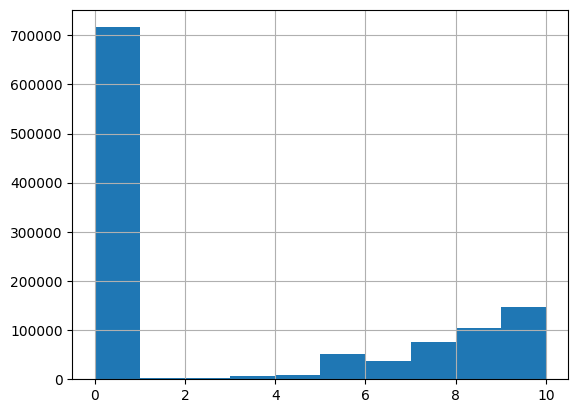

In [14]:
# Dando mais uma cheirada nos dados de reviews
reviews_df['nota'].hist()

In [15]:
# Vamos juntar as duas bases? Qual a coluna em comum? isbn!
livros_reviews_df = livros_df.merge(reviews_df, on='isbn')

livros_reviews_df.head()

,isbn,titulo,autor,url_capa,usuario,nota
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [16]:
livros_reviews_df = livros_reviews_df.groupby(['isbn', 'titulo'])['nota'].mean().to_frame().reset_index()

livros_reviews_df.head()

,isbn,titulo,nota
0,0000913154,The Way Things Work: An Illustrated Encycloped...,8.0
1,0001010565,Mog's Christmas,0.0
2,0001046438,Liar,9.0
3,0001046713,Twopence to Cross the Mersey,0.0
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",6.0


In [18]:
# Ordenação
livros_reviews_df.sort_values('nota', ascending=False)

,isbn,titulo,nota
231152,1575848236,To The Rescue (Move and Play),10.0
24662,0195061659,Prometheus Bound (Greek Tragedy in New Transla...,10.0
195985,0871359057,Dinosaurs: A Celebration,10.0
195986,0871359243,Dinosaurs: A Celebration,10.0
195987,0871359251,Dinosaurs: A Celebration,10.0
...,...,...,...
124693,0590319299,Cindy,0.0
124694,0590319302,That Other Girl,0.0
124695,0590319329,My Bodyguard,0.0
124696,059031954X,Dreams of Victory,0.0


In [19]:
# Todos os dados das duas tabelas
livros_ratings_completo_df = pd.merge(livros_df, reviews_df, on='isbn')

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [20]:
livros_ratings_completo_df.shape

(1031136, 6)

In [21]:
# Retirando os livros que não tiveram nenhum rating (tadinho, nem a mãe do cienasta votou)
livros_ratings_completo_df = livros_ratings_completo_df.dropna(axis = 0, subset = ['titulo'])

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [22]:
livros_ratings_completo_df.shape

(1031136, 6)

In [23]:
# Calculando quantos ratings cada livro teve (agrupando por título e contando os ratings)
qtdade_reviews = livros_ratings_completo_df.groupby(by = ['isbn', 'titulo'])['nota'].count().reset_index()

qtdade_reviews.sort_values('nota', ascending=False).head(20)

,isbn,titulo,nota
215952,0971880107,Wild Animus,2502
38570,0316666343,The Lovely Bones: A Novel,1295
70798,0385504209,The Da Vinci Code,883
7344,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
32370,0312195516,The Red Tent (Bestselling Backlist),723
87397,044023722X,A Painted House,647
21342,0142001740,The Secret Life of Bees,615
145042,067976402X,Snow Falling on Cedars,614
133142,0671027360,Angels &amp; Demons,586
93847,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,585


In [24]:
# Alterando o nome da coluna para total de ratings
qtdade_reviews = qtdade_reviews.rename(columns = {'nota': 'qtdade_reviews'})

qtdade_reviews

,isbn,titulo,qtdade_reviews
0,0000913154,The Way Things Work: An Illustrated Encycloped...,1
1,0001010565,Mog's Christmas,2
2,0001046438,Liar,1
3,0001046713,Twopence to Cross the Mersey,1
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",1
...,...,...,...
270146,B000234N76,Falling Angels,1
270147,B000234NC6,It Must've Been Something I Ate: The Return of...,1
270148,B00029DGGO,"Good Wife Strikes Back, The",1
270149,B0002JV9PY,The Blockade Runners,1


In [25]:
# Trazendo agora o total de ratings para o df completo
livros_ratings_completo_df = livros_ratings_completo_df.merge(qtdade_reviews, on = 'isbn')

livros_ratings_completo_df.head()

,isbn,titulo_x,autor,url_capa,usuario,nota,titulo_y,qtdade_reviews
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0,Classical Mythology,1
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5,Clara Callan,14
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0,Clara Callan,14
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8,Clara Callan,14
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0,Clara Callan,14


In [26]:
livros_ratings_completo_df = livros_ratings_completo_df.drop(['titulo_y'], axis=1)

livros_ratings_completo_df = livros_ratings_completo_df.rename(columns={'titulo_x': 'titulo'})

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota,qtdade_reviews
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,2,0,1
1,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,8,5,14
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11400,0,14
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,11676,8,14
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,41385,0,14


In [27]:
# Vamos filtrar um pouco os livros com poucos ratings pra não poluir muito nossas recomendações
limite_polularidade = 50

livros_ratings_completo_df= livros_ratings_completo_df.query('qtdade_reviews >= @limite_polularidade').sort_values(by='qtdade_reviews', ascending=False)

livros_ratings_completo_df.head()

,isbn,titulo,autor,url_capa,usuario,nota,qtdade_reviews
2506,0971880107,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,196047,0,2502
2205,0971880107,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,161068,1,2502
2231,0971880107,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,164105,0,2502
2232,0971880107,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,164315,6,2502
2233,0971880107,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,164533,0,2502


In [28]:
len(livros_ratings_completo_df['titulo'].unique())

1964

In [29]:
# Contrario do head. Pega as últimas 5 linhas
livros_ratings_completo_df.tail()

,isbn,titulo,autor,url_capa,usuario,nota,qtdade_reviews
168062,0553579835,The Matarese Countdown,Robert Ludlum,http://images.amazon.com/images/P/0553579835.0...,39281,0,50
168061,0553579835,The Matarese Countdown,Robert Ludlum,http://images.amazon.com/images/P/0553579835.0...,33816,5,50
168060,0553579835,The Matarese Countdown,Robert Ludlum,http://images.amazon.com/images/P/0553579835.0...,26544,0,50
168059,0553579835,The Matarese Countdown,Robert Ludlum,http://images.amazon.com/images/P/0553579835.0...,24921,0,50
110980,0929634063,50 Simple Things You Can Do to Save the Earth,Earthworks Group,http://images.amazon.com/images/P/0929634063.0...,64241,0,50


<h2 style="color: #6c5b7b">E a famigerada distância de cosseno???</h2>

<p>Chegou o grande momento!! Lembra que na distância de cosseno criamos vetores para cada filme?</p>

<p>Precisamos fazer alguma coisa com os dados para que cada linha seja um filme e as colunas sejam as notas de cada um dos usuários. Para isso precisamos PIVOTAR o dataframe.</p>

<p>Depois de temos os vetores certinho, ou seja, um vetor para cada livro, vamos usar o scikit-learn para fazer esse calculo pra gente. </p>


In [30]:
## Agora, vamos pivotar nossa tabela para que tenhamos os livros como linhas e os usuários como colunas!
## Os valores são os ratings
# index em pandas é o NOME de cada linha
livro_por_usuario = livros_ratings_completo_df.pivot_table(index='titulo', columns='usuario', values='nota').fillna(0)

livro_por_usuario.head()

usuario,9,14,16,17,26,32,39,42,44,51,...,278813,278819,278828,278832,278836,278843,278844,278846,278851,278854
titulo,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Como nossa matriz é muito esparsa (as pessoas não votam em todos os livros),
# é interessante utilizar uma estrutura de dados que seja mais "inteligente" 
# ao armazenar os valores
from scipy.sparse import csr_matrix

matriz_livro_por_usuario = csr_matrix(livro_por_usuario.values)

In [32]:
from sklearn.neighbors import NearestNeighbors

# Olha como é mole! Dissemos que a métrica de distância é cosseno
#modelo_recsys = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
modelo_recsys = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# Aqui acontece o treinamento, ou seja, vai ser calculado todas as distâncias
# de cada par de livros!
modelo_recsys.fit(matriz_livro_por_usuario)

NearestNeighbors(algorithm='brute', metric='cosine')

<h2 style="color: #6c5b7b">Vamos testar com algum livro do Harry Potter???</h2>

<p>.</p>


In [33]:
livro_por_usuario.head()

usuario,9,14,16,17,26,32,39,42,44,51,...,278813,278819,278828,278832,278836,278843,278844,278846,278851,278854
titulo,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
livro_por_usuario.loc[livro_por_usuario.index.str.contains('Harry Potter'), ].index

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))'],
      dtype='object', name='titulo')

In [35]:
livro_harry_potter = "Harry Potter and the Sorcerer's Stone (Book 1)"

posicao_harry_potter = livro_por_usuario.index.get_loc(livro_harry_potter)

posicao_harry_potter

627

In [36]:
# Buscar os 6 "vizinhos" mais parecidos com o livro 1 do 
# Harry Potter
quantidade_recomendacoes = 6

distancias, indices = modelo_recsys.kneighbors(livro_por_usuario.iloc[posicao_harry_potter,:].values.reshape(1, -1), n_neighbors = quantidade_recomendacoes)

print(f'Livro: {livro_por_usuario.index[posicao_harry_potter]} - índice {posicao_harry_potter}')

Livro: Harry Potter and the Sorcerer's Stone (Book 1) - índice 627


In [37]:
for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_por_usuario.index[posicao_harry_potter]))
    else:
        print('{0}: {1}, com a distância de {2}:'.format(i, livro_por_usuario.index[indices.flatten()[i]], distancias.flatten()[i]))

Recomendações para Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), com a distância de 0.6258004386107232:
2: Harry Potter and the Prisoner of Azkaban (Book 3), com a distância de 0.6293515771074749:
3: Harry Potter and the Goblet of Fire (Book 4), com a distância de 0.6362243589522747:
4: Harry Potter and the Order of the Phoenix (Book 5), com a distância de 0.7453910756400858:
5: The Hobbit: or There and Back Again, com a distância de 0.8616911944642508:


In [38]:
quantidade_recomendacoes = 21

distancias, indices = modelo_recsys.kneighbors(livro_por_usuario.iloc[posicao_harry_potter,:].values.reshape(1, -1), n_neighbors = quantidade_recomendacoes)

for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_por_usuario.index[posicao_harry_potter]))
    else:
        print('{0}: {1}, com a distância de {2}:'.format(i, livro_por_usuario.index[indices.flatten()[i]], distancias.flatten()[i]))

Recomendações para Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), com a distância de 0.6258004386107232:
2: Harry Potter and the Prisoner of Azkaban (Book 3), com a distância de 0.6293515771074749:
3: Harry Potter and the Goblet of Fire (Book 4), com a distância de 0.6362243589522747:
4: Harry Potter and the Order of the Phoenix (Book 5), com a distância de 0.7453910756400858:
5: The Hobbit: or There and Back Again, com a distância de 0.8616911944642508:
6: The Fellowship of the Ring (The Lord of the Rings, Part 1), com a distância de 0.9082531599499352:
7: Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1), com a distância de 0.9091439346701685:
8: The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2), com a distância de 0.919021992112744:
9: Talking God (Jim Chee Novels), com a distância de 0.9200087798804386:
10: N Is for Noose (Kinsey Millhone Mysteries (Hardcover)), com a distância de 0.9201806907230

<h2 style="color: #6c5b7b">Eita! Lembra que temos as URLs das capas? Vamos usar?</h2>

<p>.</p>


In [39]:
from IPython.display import HTML

for i in range(0, len(distancias.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(livro_por_usuario.index[posicao_harry_potter]))
    else:
        # Pegando o título da recomendação
        titulo_recomendacao = livro_por_usuario.index[indices.flatten()[i]]
        
        # Buscando a url da capa a partir do título (não temos mais o isbn, lembra?)
        titulo, url_capa = livros_df.loc[livros_df['titulo'] == titulo_recomendacao, ['titulo', 'url_capa']].values[0]
        
        # Imprimindo o título e usando a função HTML para mostrar a imagem a partir
        # da URL
        print(f'Recomendação {i}: {titulo}')
        display(HTML(f'<img src="{url_capa}">'))

Recomendações para Harry Potter and the Sorcerer's Stone (Book 1):

Recomendação 1: Harry Potter and the Chamber of Secrets (Book 2)


Recomendação 2: Harry Potter and the Prisoner of Azkaban (Book 3)


Recomendação 3: Harry Potter and the Goblet of Fire (Book 4)


Recomendação 4: Harry Potter and the Order of the Phoenix (Book 5)


Recomendação 5: The Hobbit: or There and Back Again


Recomendação 6: The Fellowship of the Ring (The Lord of the Rings, Part 1)


Recomendação 7: Dragons of Autumn Twilight (Dragonlance Chronicles, Vol 1)


Recomendação 8: The Lion, the Witch, and the Wardrobe (The Chronicles of Narnia, Book 2)


Recomendação 9: Talking God (Jim Chee Novels)


Recomendação 10: N Is for Noose (Kinsey Millhone Mysteries (Hardcover))


Recomendação 11: The Mists of Avalon


Recomendação 12: The Secret Garden


Recomendação 13: The Mammoth Hunters (Auel, Jean M. , Earth's Children.)


Recomendação 14: The Hobbit : The Enchanting Prelude to The Lord of the Rings


Recomendação 15: The Shelters of Stone (Earth's Children Series, No 5)


Recomendação 16: Considering Kate (The Stanislaskis) (Silhouette Special Edition)


Recomendação 17: Charlotte's Web (Trophy Newbery)


Recomendação 18: The Return of the King (The Lord of the Rings, Part 3)


Recomendação 19: Dragonsdawn


Recomendação 20: Princess in the Spotlight (The Princess Diaries, Vol. 2)


<h2 style="color: #6c5b7b">Temos um sistema de recomendações!!</h2>

<p>Com base no histórico de leitura de um usuário, podemos selecionar os livros que mais se assemelham! Isso pode ser feito para qualquer coisa! Basta termos os itens e as informações de review. Veja como é simples e poderoso.</p>


<h2 style="color: #6c5b7b">E agora??</h2>

<p>De posse do modelo, podemos incluir num sistema de venda de livros! Cenas do próximo capítulo, ou melhor, amanhã, na nossa última aula ;)</p>
